In [33]:
#Import Existing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<h4>Load the Datasets

In [34]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df1.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,?,26.5,2.710,y,p,?,?,0.085,f,f,0,f,s,80,0,-


In [35]:
#Replacing all ? as NaN and dropping all null values in train dataset.
#In test dataset, missing values filled with the most frequently occuring values in respective column.
df2 = df2.replace('?',np.nan)
df2['Male'] = df2['Male'].fillna(df2['Male'].mode().iloc[0])
df2.replace('?',np.nan).isnull().sum()
df1.head()
df1.fillna(df1.mean(), inplace=True)
df1.replace('?',np.nan,inplace=True)
#df2.replace('?','a',inplace=True)
df1.dropna(inplace = True)
df1["Age"] = pd.to_numeric(df1["Age"])
#df_final = df.fillna(df.mean())
df1.shape

(554, 17)

<h2>Exploratory Data Analysis

[Text(0, 0.5, 'Age'), Text(0.5, 0, 'Approved')]

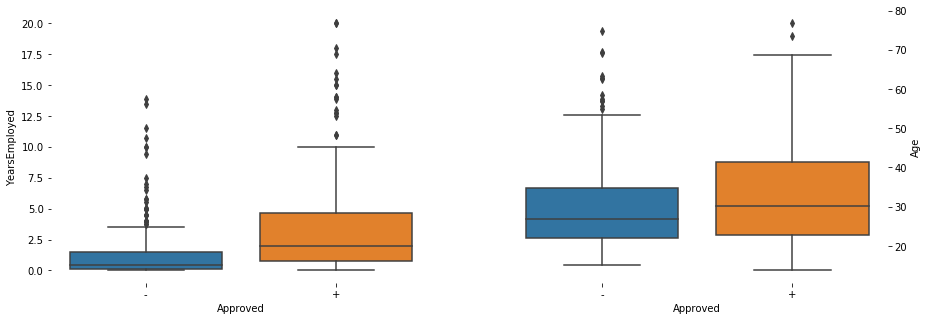

In [36]:
#Analysis of effect of various parameters on output
f, axes = plt.subplots(1, 2,figsize = (15,5))
sns.boxplot(x = df1['Approved'],y = df1['YearsEmployed'], ax = axes[0])
sns.boxplot(x = df1['Approved'],y = df1['Age'], ax = axes[1])
sns.despine(left = True, bottom = True)
axes[0].set(xlabel = 'Approved', ylabel = 'YearsEmployed')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel = 'Approved', ylabel = 'Age')


<h4>The first Graph shows that there is a higher chance of approval as the years in employment increase and the age increases

c     115
q      62
w      50
i      49
aa     48
ff     46
k      42
x      31
m      30
cc     28
e      21
d      20
j      10
r       2
Name: EducationLevel, dtype: int64
u    414
y    138
l      2
Name: Married, dtype: int64


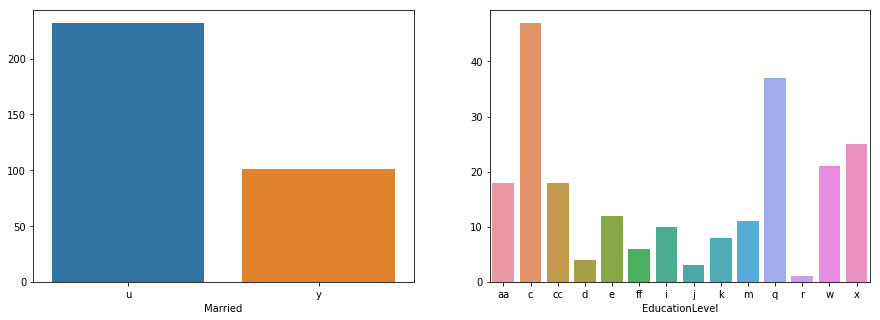

In [37]:
f, axes = plt.subplots(1, 2,figsize = (15,5))
y = df1[df1['Approved']=='-'].groupby(['Married'])['Key'].agg(np.size).values
x = df1[df1['Approved']=='-'].groupby(['Married'])['Key'].agg(np.size).index
sns.barplot(x=x, y=y, data=df1, ax=axes[0])
y = df1[df1['Approved']=='+'].groupby(['EducationLevel'])['Key'].agg(np.size).values
x = df1[df1['Approved']=='+'].groupby(['EducationLevel'])['Key'].agg(np.size).index
sns.barplot(x=x, y=y, data=df1, ax = axes[1])
print(df1['EducationLevel'].value_counts())
print(df1['Married'].value_counts())


###TODO : SHow binning  ka ek graph

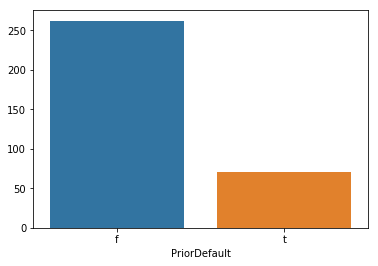

In [38]:
y = df1[df1['Approved']=='-'].groupby(['PriorDefault'])['Key'].agg(np.size).values
x = df1[df1['Approved']=='-'].groupby(['PriorDefault'])['Key'].agg(np.size).index
sns.barplot(x=x, y=y, data=df1)


In [39]:
#Extracting the useful features
features = ['Age','Debt','Married','EducationLevel','Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense','Citizen','Income']

In [40]:
X1 = df1[features]
X2 = df2[features]

In [41]:
#Merging Train and test datasets for label encoding, to ensure both get encoded the same way.
X = X1.append(X2,sort=False)

In [42]:
#Converting age to float from string 
X = X.astype({'Age':'float64'})

<h3>Age Binning

In [43]:
#To find minimum and maximum limits for age binning
print(X['Age'].min(), X['Age'].max())

13.75 76.75


In [44]:
# Converting Age to categorical feature
bins = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
X['ageBinned'] = pd.cut(X['Age'], bins=bins, labels=labels)
X.head()

,Age,Debt,Married,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,ageBinned
8,38.58,5.000,u,cc,v,13.500,t,f,0,t,g,0,6
9,19.17,0.585,y,aa,v,0.585,t,f,0,t,g,0,2
10,27.67,1.500,u,m,v,2.000,t,f,0,f,s,0,4
12,49.00,1.500,u,j,j,0.000,t,f,0,t,g,27,8
13,28.58,3.540,u,i,bb,0.500,t,f,0,t,g,0,4


<h3>Encoding Categorical Variables

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
X.select_dtypes(exclude=['float64','int']).head()

,Married,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ageBinned
8,u,cc,v,t,f,t,g,6
9,y,aa,v,t,f,t,g,2
10,u,m,v,t,f,f,s,4
12,u,j,j,t,f,t,g,8
13,u,i,bb,t,f,t,g,4


In [47]:
catindex = [X.columns.get_loc(col) for col in (X.select_dtypes(include=['object'],exclude=['float']))]
for i in catindex:
    X.iloc[:,i] = le.fit_transform(X.iloc[:,i])
X = X.drop(['Age'], axis = 1) 

In [48]:
#Now Seperating back into train and test respectively
X_train = X[0:(X1.shape[0])]
X_test = X[X1.shape[0]:]
X_train.head()

,Debt,Married,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,ageBinned
8,5.000,1,2,7,13.500,1,0,0,1,0,0,6
9,0.585,2,0,7,0.585,1,0,0,1,0,0,2
10,1.500,1,9,7,2.000,1,0,0,0,2,0,4
12,1.500,1,7,4,0.000,1,0,0,1,0,27,8
13,3.540,1,6,0,0.500,1,0,0,1,0,0,4


In [49]:
y_train = df1['Approved']
y_train.head()

8     -
9     -
10    -
12    -
13    -
Name: Approved, dtype: object

In [50]:
y_train = le.fit_transform(y_train)

<h1>Logistic Regression

In [51]:
# Logistic regression and K-fold validation

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score

logreg = LogisticRegression()
scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
print(scores.mean())
logreg.fit(X_train,y_train)
predictions = logreg.predict(X_test)


0.8464832535885167


In [52]:
# This is a function to convert encoded variables of the approved column back to original categorical data

def symb(a):
    if a==0:
        return '+'
    return '-'

In [53]:
# Preparing the dataframe for submission

y_test = predictions
testdf = pd.DataFrame()
y_test = [symb(a) for a in y_test]

In [54]:
testdf['Key'] = df2['Key']
testdf['Approved'] = y_test
testdf.head()

,Key,Approved
0,1,-
1,2,-
2,3,-
3,4,-
4,5,-


In [55]:
testdf.to_csv('solution.csv',index=False)

<h3>To test with unknown sample

In [57]:
#this is the correct answers of X_test
ansdf = pd.DataFrame()
answer = ['-','-','-','-','-','-','-','-','-','-','-','-','+','-','-','-','-','-','-','-','-','-','-','-','-','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+','+',]
len(answer)
#answer = pd.DataFrame(answer)
ansdf['Approved'] = answer
print(ansdf.head())
ansdf['Approved'] = ansdf['Approved'].map({'+': 0, '-': 1})
ansdf

  Approved
0        -
1        -
2        -
3        -
4        -


,Approved
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [58]:
from sklearn.metrics import classification_report
predictions = logreg.predict(X_test)
print("Classification Report")
print(classification_report(ansdf['Approved'], predictions))


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        76
           1       0.71      1.00      0.83        24

   micro avg       0.90      0.90      0.90       100
   macro avg       0.85      0.93      0.88       100
weighted avg       0.93      0.90      0.91       100



<h3>The above method gives a cross validation score of 84.6% and on unknown sample gives a f1-score of 0.88.


<h3> It can be further improved by imputing missing values, binning other features etc.